# Implementation of  Perlin Noise improved version  

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#### setup permutation table

In [2]:
permutation = [151,160,137,91,90,15,131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180]

#### enlarged array permutation function that will be used for hashing and will avoid overflow

In [3]:
p = []

In [4]:
for x in range(0, 512):
    p.append(permutation[x % 256])

## Repeat constant should limit the number of repetition

In [5]:
repeat = -1

#### Increment function for better hashing 

In [6]:
def inc(num):
    num += 1
    if repeat > 0 :
        num = num % repeat
    
    return num

#### Fade function
<p>Fade function as defined by Ken Perlin.  This eases coordinate values so that they will "ease" towards integral values.  This ends up smoothing the final output.</p>

In [7]:
# 6t^5 - 15t^4 + 10t^3
def fade(t):
    return t * t * t *(t * (t * 6 - 15) + 10)

#### Lerp function
<p>Linear Interpolate</p>

In [8]:
def lerp(a, b, x):
    return a + x * (b - a)

#### Grad function


In [9]:
def grad(hash, x, y, z):
    h = hash & 15             #Take the hashed value and take the first 4 bits of it (15 == 0b1111)
    u = x if h < 8 else y     #f the most significant bit (MSB) of the hash is 0 then set u = x.  Otherwise y.
    v = 0.0
    
    if h < 4:                 
        v = y                 #If the first and second significant bits are 0 set v = y
    elif h == 12 or h == 14 :
        v = x                 #If the first and second significant bits are 1 set v = x
    else :
        v = z                 #If the first and second significant bits are not equal (0/1, 1/0) set v = z
    
    #Use the last 2 bits to decide if u and v are positive or negative.  Then return their addition.
    return (u if (h & 1) == 0 else -u) + (v if (h & 2) == 0 else -v)

### Perlin noise finction

In [10]:
def perlin(x, y, z):
    if repeat > 0 :                  #If we have any repeat on, change the coordinates to their "local" repetitions 
        x = x % repeat        
        y = y % repeat        
        z = z % repeat
    
    #Calculate the "unit cube" that the point asked will be located in
    #The left bound is ( |_x_|,|_y_|,|_z_| ) and the right bound is that
    #plus 1.  Next we calculate the location (from 0.0 to 1.0) in that cube.
    #We also fade the location to smooth the result.

    xi = int(x) & 255               
    yi = int(y) & 255    
    zi = int(z) & 255   
    
    xf = x - int(x)
    yf = y - int(y)    
    zf = z - int(z)
    u = fade(xf)
    v = fade(yf)
    w = fade(zf)       
    
    aaa = p[p[p[xi] + yi ]+ zi]
    aba = p[p[p[xi] + inc(yi)] + zi]
    aab = p[p[p[xi] + yi ]+ inc(zi)]
    abb = p[p[p[xi] + inc(yi)]+ inc(zi)]
    baa = p[p[p[inc(xi)] + yi ]+ zi]
    bba = p[p[p[inc(xi)] + inc(yi)]+ zi]
    bab = p[p[p[inc(xi)] + yi]+inc(zi)]
    bbb = p[p[p[inc(xi)] + inc(yi)]+inc(zi)]
    
    #The gradient function calculates the dot product between a pseudorandom
    #gradient vector and the vector from the input coordinate to the 8
    #surrounding points in its unit cube.
    #This is all then lerped together as a sort of weighted average based on the faded (u,v,w)
    #values we made earlier.

    x1 = lerp(grad (aaa, xf  , yf  , zf),grad(baa, xf-1, yf  , zf), u)
    x2 = lerp(grad (aba, xf  , yf-1, zf),grad(bba, xf-1, yf-1, zf), u)
    y1 = lerp(x1, x2, v)

    x1 = lerp(grad (aab, xf  , yf  , zf-1),grad (bab, xf-1, yf , zf-1), u)
    x2 = lerp(grad (abb, xf  , yf-1, zf-1),grad (bbb, xf-1, yf-1, zf-1), u)
    y2 = lerp (x1, x2, v)

    return (lerp(y1, y2, w) + 1) / 2.0

## Perlin Noise Octaves function

In [11]:
def octave_perlin(x, y, z, octaves, persistence):
    total = 0
    frequency = 1
    amplitude = 1
    max_value = 0
    
    for i in range(0, octaves):
        total += perlin(x * frequency, y * frequency, z * frequency) * amplitude
        max_value += amplitude
        amplitude *= 2
        frequency *= 2
    
    return total/max_value

# Generate Perlin voice

In [12]:
result = octave_perlin(1, 2, 3, 3, 2)
print(result)

0.5


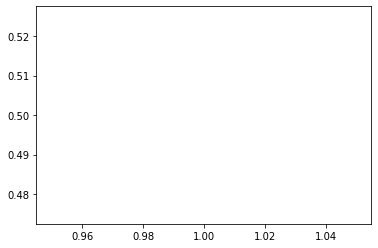

In [23]:
x_axis = np.linspace(1,1000, 1)
y_axis = [octave_perlin(num, 0, 0, 2, 2) for num in x_axis ]

plt.plot(x_axis,y_axis)